# Slotted ALOHA Implementation:





Window size:  8
N =  1: 0.223080
N =  2: 0.345780
N =  3: 0.404700
N =  4: 0.420360
N =  5: 0.406010
N =  6: 0.380470
N =  7: 0.341710
N =  8: 0.306100
N =  9: 0.269050
N = 10: 0.230950
N = 11: 0.197400
N = 12: 0.165410
N = 13: 0.143430
N = 14: 0.118210
N = 15: 0.100730
N = 16: 0.081560
N = 17: 0.068010
N = 18: 0.055450
N = 19: 0.045510
N = 20: 0.036470
N = 21: 0.030840
N = 22: 0.024000
N = 23: 0.020580
N = 24: 0.016700
N = 25: 0.012950
N = 26: 0.011100
N = 27: 0.008700
N = 28: 0.006470
N = 29: 0.005650
N = 30: 0.004350
N = 31: 0.003440
N = 32: 0.002820

Window size: 16
N =  1: 0.117600
N =  2: 0.206530
N =  3: 0.276150
N =  4: 0.322330
N =  5: 0.354900
N =  6: 0.376020
N =  7: 0.387070
N =  8: 0.391300
N =  9: 0.387140
N = 10: 0.379030
N = 11: 0.370010
N = 12: 0.355120
N = 13: 0.340530
N = 14: 0.322500
N = 15: 0.305810
N = 16: 0.289900
N = 17: 0.267960
N = 18: 0.251070
N = 19: 0.233910
N = 20: 0.216870
N = 21: 0.202820
N = 22: 0.186870
N = 23: 0.171460
N = 24: 0.158480
N = 25: 0.14605

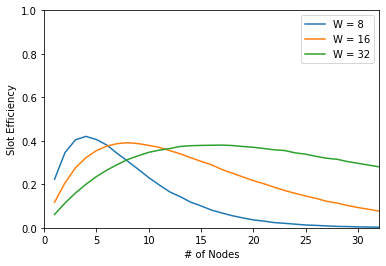

In [ ]:
#Slotted ALOHA Implementation 
from matplotlib.cbook import print_cycles
import random
import matplotlib.pyplot as plt

TSLOTS = 100000

class classNode:
	def __init__(self, ttl):
		self.ttl = ttl # slots left until retransmission
	def tick(self):
		self.ttl = self.ttl - 1


def main():
	random.seed()

	for window_size in [8, 16, 32]:
		Nlist = []
		selist = []
		print("Window size: {0:2d}".format(window_size))

		for N in range(1, 33):
			snode = [ classNode(random.randrange(0, window_size)) for _ in range(N) ]
			successful_slots = 0
			slot_efficiency = 0
	
			for slot in range(TSLOTS):
				transmitted_nodes = []
	
				for i in range(N):
					if not snode[i].ttl:
						transmitted_nodes.append(i)
						snode[i].ttl = random.randrange(0, window_size)
					else:
						snode[i].tick()
	
				if not transmitted_nodes:
					pass 
	
				if (len(transmitted_nodes) == 1):
					successful_slots = successful_slots + 1
				
				if (len(transmitted_nodes) > 2):
					for j in transmitted_nodes:
						snode[j].ttl = random.randrange(0, window_size)
				
			slot_efficiency = (successful_slots/float(TSLOTS))
	
			print("N = {0:2d}: {1:f}".format(N, slot_efficiency))
			
			Nlist.append(N)
			selist.append(slot_efficiency)
		
		plt.plot(Nlist, selist)
		print("")

	plt.xlabel("# of Nodes")
	plt.ylabel("Slot Efficiency")
	plt.legend(['W = 8', 'W = 16', 'W = 32'], loc='upper right')
	plt.axis([0, 32, 0, 1])
	# plt.grid(linestyle='--')
	plt.show()

	return


if __name__ == "__main__":
	main()



---


# ALOHA-Q Implementation:


8
16
32


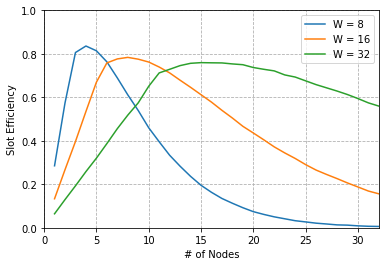

In [ ]:
import random
import matplotlib.pyplot as plt
  
from heapq import heappop, heappush, heapify


TSLOTS = 100000

class Slot:
  def __init__(self) -> None:
      self.q_value = 0
  def transmission_success(self, l_rate):
    self.q_value += l_rate
  def transmission_failed(self, l_rate):
    self.q_value -= l_rate


class classNode:
	def __init__(self, ttl):
		self.ttl = ttl # slots left until retransmission
	def tick(self):
		self.ttl = self.ttl - 1


def main():
  random.seed()
  for window_size in [8, 16, 32]: 
    print(window_size)
    Nlist = []
    selist = []
    
    for N in range(1, 33): #nodes 1 - 32 varying

      # print(window_size, N)
      snode = [ classNode(0) for _ in range(N) ]
      
      successful_slots = 0
      slot_efficiency = 0

      heap = []
      heapify(heap)
      for slot in range(TSLOTS):
        heappush(heap, 0)

      iterations = 0
      while len(heap) > 0:
        iterations += 1
        q = -1 * heappop(heap)
        if iterations > 200000:
          break

        transmitted_nodes = []
        for i in range(N):
          if snode[i].ttl == 0:
            transmitted_nodes.append(i)
            snode[i].ttl = random.randrange(0, window_size)
          else:
            snode[i].tick()
        
        if len(transmitted_nodes) == 0:
          pass
        
        if (len(transmitted_nodes) == 1):
          successful_slots = successful_slots + 1
          heappush(heap, -1 * (q + 0.01 * (1 - q)))
				
        if (len(transmitted_nodes) >= 2):
          heappush(heap, -1 * (q + 0.01 * (-1 - q)))
          for j in transmitted_nodes:
            snode[j].ttl = random.randrange(0, window_size)
				
      slot_efficiency = (successful_slots/float(TSLOTS))
      
      # print(N, slot_efficiency)
      Nlist.append(N)
      selist.append(slot_efficiency)
    plt.plot(Nlist, selist)
    # print ("")
    
  plt.xlabel("# of Nodes")
  plt.ylabel("Slot Efficiency")
  plt.legend(['W = 8', 'W = 16', 'W = 32'], loc='upper right')
  plt.axis([0, 32, 0, 1])
  plt.grid(linestyle='--')
  plt.show()
  return


if __name__ == "__main__":
	main()



---



---






# **Below are the codes we've tried in the process of getting the final code for ALOHA-Q **

In [ ]:


#!/usr/bin/python
# -*- coding: utf-8 -*-
# For ALOHA-Q approach 2

import random
import numpy as np
import matplotlib.pyplot as plt

TSLOTS = 64


class classNode:

    def __init__(self, ttl):
        self.ttl = ttl  # slots left until retransmission

    def tick(self):
        self.ttl -= 1


def calculations(Q,r,alpha,i):
	# print("Q[i]:  ", Q[i]," ",r," ",alpha," ",i)
	# print(Q)
	Q[i] = Q[i]+(alpha*(r-Q[i]))
	# print("Q[i]:  ",Q[i]," ",r," ",alpha," ",i)
	return Q


def maxFunc(Q):
    cur = 0
    for x in range(len(Q)):
        if Q[x] > Q[cur]:
            cur = x
    return cur


def main():
    random.seed()

    for window_size in [8, 16, 32]:
        Nlist = []
        selist = []

        print ('Window size: {0:2d}'.format(window_size))

        for N in range(2, 33):


            successful_slots = 0
            Q = [0 for _ in range(N)]
            SlotForEachNode = [random.randrange(0,N) for _ in range(N)]
            snode = [classNode(random.randrange(0, N))
                     for _ in range(N)]
            # dictRem = {}
            for k in range(200): #frames
              temp_successful_slots = 0
              nodeIndex = -1
              ls = []

              # # Random Pick

              for node in range(N):
                  if not snode[node].ttl:
                      temp_successful_slots += 1
                      nodeIndex = node
                      ls.append(node)
                      snode[node].ttl = random.randrange(0,
                              N)
                  else:
                      snode[node].tick()

              # Random Pick

              if nodeIndex == -1:
                  pass
              maxIndex = maxFunc(Q)
              if temp_successful_slots == 1 and nodeIndex != -1:
                  
                  successful_slots = successful_slots + 1
                  Q = calculations(Q, 1.0, 0.1, maxIndex)

              if temp_successful_slots >= 2:
                  Q = calculations(Q, -1.0, 0.1,maxIndex)
                    
            print ('N: ', N, 'successful_slots: ', successful_slots)

            slot_efficiency = (successful_slots/float(TSLOTS))
            Nlist.append(N)
            selist.append(slot_efficiency)
        
    #plt.xlabel("# of Nodes")
    #plt.ylabel("Slot Efficiency")
    #plt.legend(['W = 8', 'W = 16', 'W = 32'], loc='upper right')
    #plt.axis([0, 32, 0, 1])
    # plt.grid(linestyle='--')
    #plt.show()
    return


if __name__ == '__main__':
    main()


Window size:  8
N:  2 successful_slots:  98
N:  3 successful_slots:  68
N:  4 successful_slots:  58
N:  5 successful_slots:  71
N:  6 successful_slots:  60
N:  7 successful_slots:  62
N:  8 successful_slots:  64
N:  9 successful_slots:  53
N:  10 successful_slots:  72
N:  11 successful_slots:  60
N:  12 successful_slots:  56
N:  13 successful_slots:  55
N:  14 successful_slots:  67
N:  15 successful_slots:  61
N:  16 successful_slots:  65
N:  17 successful_slots:  63
N:  18 successful_slots:  55
N:  19 successful_slots:  53
N:  20 successful_slots:  55
N:  21 successful_slots:  58
N:  22 successful_slots:  55
N:  23 successful_slots:  64
N:  24 successful_slots:  66
N:  25 successful_slots:  56
N:  26 successful_slots:  50
N:  27 successful_slots:  58
N:  28 successful_slots:  62
N:  29 successful_slots:  63
N:  30 successful_slots:  37
N:  31 successful_slots:  47
N:  32 successful_slots:  61
Window size: 16
N:  2 successful_slots:  97
N:  3 successful_slots:  80
N:  4 successful_slot

Streaming output truncated to the last 5000 lines.
[14]
[5]
[5, 9]
[5, 9, 15]
[20]
[20]
[18]
[18]
[10]
[0]
[0, 5]
[0, 5, 7]
[0, 5, 7, 8]
[0, 5, 7, 8, 11]
[0]
[0, 4]
[0, 4, 8]
[0, 4, 8, 19]
[1]
[1, 2]
[1, 2, 6]
[3]
[3, 5]
[3, 5, 7]
[3, 5, 7, 19]
[13]
[13, 16]
[13, 16, 17]
[1]
[1, 9]
[1, 9, 14]
[1, 9, 14, 19]
[8]
[8, 11]
[8, 11, 12]
[8, 11, 12, 14]
[8, 11, 12, 14, 20]
[3]
[2]
[2, 15]
[0]
[8]
[8, 18]
[9]
[9, 18]
[6]
[6, 7]
[6, 7, 8]
[2]
[2, 10]
[2, 10, 13]
[2, 10, 13, 15]
[2, 10, 13, 15, 17]
[9]
[9, 11]
[9, 11, 16]
[9, 11, 16, 17]
[3]
[3, 13]
[3, 13, 18]
[3, 13, 18, 19]
[4]
[4, 5]
[4, 5, 14]
[1]
[1, 13]
[12]
[0]
[0, 8]
[0, 8, 15]
[0, 8, 15, 20]
[2]
[2, 11]
[2, 11, 16]
[5]
[6]
[6, 9]
[6, 9, 19]
[5]
[5, 7]
[5, 7, 18]
[7]
[7, 8]
[7, 8, 15]
[7, 8, 15, 19]
[12]
[12, 14]
[10]
[0]
[0, 1]
[0, 1, 3]
[0, 1, 3, 9]
[0, 1, 3, 9, 14]
[6]
[6, 9]
[6, 9, 13]
[6, 9, 13, 17]
[4]
[4, 14]
[4, 14, 18]
[11]
[11, 14]
[11, 14, 16]
[11, 14, 16, 19]
[11, 14, 16, 19, 20]
[3]
[3, 18]
[10]
[4]
[4, 14]
[4, 14, 20]
[7]


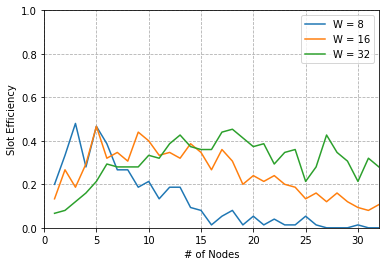

In [ ]:
# For ALOHA-Q 
import random
import numpy as np
import matplotlib.pyplot as plt

TSLOTS = 75

class classNode:
	def __init__(self, ttl):
		self.ttl = ttl # slots left until retransmission
	def tick(self):
		self.ttl = self.ttl - 1


def main():
	random.seed()

	for window_size in [8, 16, 32]:
		Nlist = []
		selist = []
		print ("Window size: {0:2d}".format(window_size))

		for N in range(1,33):
			snode = [ classNode(random.randrange(0, window_size)) for _ in range(N) ]
			successful_slots = 0
			slot_efficiency = 0
			#print(snode)		

			Q=[0 for _ in range(TSLOTS)]	
			#pick a slot
			# high_Q= np.where(Q == np.amax(Q))
	 		# pickedSlot=random.choice(high_Q)
			#based on  success/collision
			#update Q value Qt+1(i,k) = Qt(i,k) + α(r- Qt(i,k))

	
			for slot in range(TSLOTS):
				transmitted_nodes = []
	
				for i in range(N):
					if not snode[i].ttl:
						transmitted_nodes.append(i)
						print(transmitted_nodes)
						snode[i].ttl = random.randrange(0, window_size)
					else:
						snode[i].tick()
	
				if not transmitted_nodes:
					pass
	
				if (len(transmitted_nodes) == 1):
					successful_slots = successful_slots + 1
				
				if (len(transmitted_nodes) > 2):
					for j in transmitted_nodes:
						snode[j].ttl = random.randrange(0, window_size)
				
			slot_efficiency = (successful_slots/float(TSLOTS))
	
			print ("N = {0:2d}: {1:f}".format(N, slot_efficiency))
			
			Nlist.append(N)
			selist.append(slot_efficiency)
		
		plt.plot(Nlist, selist)
		print ("")

	plt.xlabel("# of Nodes")
	plt.ylabel("Slot Efficiency")
	plt.legend(['W = 8', 'W = 16', 'W = 32'], loc='upper right')
	plt.axis([0, 32, 0, 1])
	plt.grid(linestyle='--')
	plt.show()

	return


if __name__ == "__main__":
	main()

In [ ]:
# pure ALOHA
import random


class Aloha():
    '''
    Aloha network simulation.Each node tries to send into a single channel.
    It generates a message (becomes active) with probability q.
    Then it tries to send the message into the channel with probability p.
    If more than one nodes try to send, collision occurs resulting to failure,
    otherwise transmission is succesful.
    '''

    def __init__(self, nodes, p_send, q_generate, epochs):
        # number of nodes
        self.nodes = nodes

        # probability that an active node will send the generated message
        self.p_send = p_send

        # probability that a node will generate a message
        self.q_generate = q_generate

        # number of time steps to simulate
        self.epochs = epochs

        # list with the state of each node, initially all inactive
        self.states = [False] * self.nodes

        # list of current latencies for each node
        self.latencies = [0] * self.nodes

        self.node_latencies = {i: [] for i in range(self.nodes)}

        # list of transmission outcomes. True for succes
        self.result = []

    def message_generation(self):
        '''
        Helper function to check message generation
        '''
        for i in range(len(self.states)):
            # need only to check for inactive nodes
            if not self.states[i]:
                if random.random() <= self.q_generate:
                    self.states[i] = True

    def transmission(self):
        senders = []
        actives = []

        # gather the indices of all active nodes
        actives = [i for i in range(len(self.states)) if self.states[i]]

        # check if an active node will try to send
        senders = [actv for actv in actives if random.random() <= self.p_send]

        # If more than one try to send we have a collision that results
        # in transmission failure
        if len(senders) > 1:
            self.result.append(False)
            # so any active node experiences latency
            for active in actives:
                self.latencies[active] += 1

        else:
            # If none wants to send then we don't experience failure
            if not senders:
                self.result.append(True)
                # but we might experience latency
                for active in actives:
                    self.latencies[active] += 1
            else:
                # Success. Only one node tries to send
                self.states[senders[0]] = False
                # keep track of the possible latency the node has experienced
                self.node_latencies[senders[0]].append(self.latencies[senders[0]])                # the sender is not latent now
                self.latencies[senders[0]] = 0
                actives.remove(senders[0])
                for active in actives:
                    self.latencies[active] += 1
                self.result.append(True)

    def simulate(self):
            for i in range(self.epochs):
                self.message_generation()
                self.transmission()

    def comp_avg_node_latency(self):
        '''
        Method to compute the average node latency
        '''
        avg = 0
        for node in range(self.nodes):
            y = [value for value in self.node_latencies[node] if value]

            if y:
                avg += sum(y) / len(y)

        return avg / self.nodes

if __name__ == '__main__':
    '''
    Code to test the accuracy of the network (#succesful_transfers/#epochs)
    and latency for various values of p
    '''

    print('Exhibition:')
    x = Aloha(10, 0.1, 0.8, 25)
    x.simulate()
    print('Result: ' + str(x.result))
    print('Node latencies: ' + str(x.node_latencies))
    print('Average node latency: ' + str(x.comp_avg_node_latency()))


Exhibition:
Result: [True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, True, True]
Node latencies: {0: [], 1: [4, 0], 2: [], 3: [16], 4: [], 5: [24], 6: [], 7: [7, 11], 8: [3, 18], 9: []}
Average node latency: 6.35


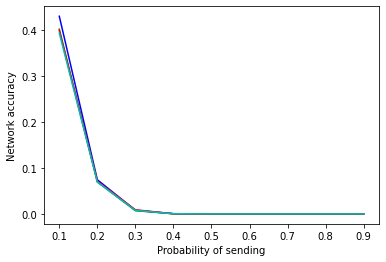

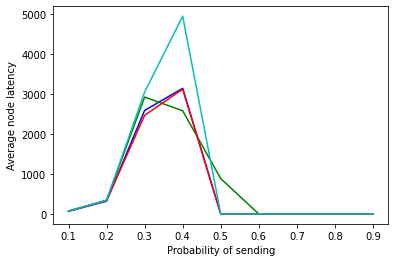

In [ ]:
#from aloha import Aloha
import matplotlib.pyplot as pl

# number of nodes
n = 20

# vector of message generation probabilities
q = [0.2, 0.4, 0.6, 0.8]

# number of epochs
e = 20000

# vector of probabilities of sending
p = [i / 100 for i in range(10, 100, 10)]

# list of lists that contain accuracy for each p
accuracies = [[], [], [], []]

# list of lists that contain average node latencies for each p
avg_node_latencies = [[], [], [], []]

# colors for line plotting
colors = ['b', 'g', 'r', 'c']

A = pl.figure(1)

# experiment will be conducted for various q values
# that will be represented with different line colors
for j in range(4):
    for i in p:
        x = Aloha(n, i, q[j], e)
        x.simulate()
        accuracies[j].append(x.result.count(True) / e)
        # print(x.node_latencies)
        avg_node_latencies[j].append(x.comp_avg_node_latency())
        # print(avg_node_latencies[j])
    pl.plot(p, accuracies[j], colors[j])


pl.xlabel('Probability of sending')
pl.ylabel('Network accuracy')
A.show()

L = pl.figure(2)

for j in range(4):
    pl.plot(p, avg_node_latencies[j], colors[j])

pl.xlabel('Probability of sending')
pl.ylabel('Average node latency')
pl.show()

In [ ]:
import numpy as np
import random

class ALOHA_Q(object):
    """
    ALOHA-Q player as described in Chu et al.
    """


    def __init__(self,
                 N=64,
                 active=True,
                 do_print=False,
                 name=None,
                 t=0,
                 retry_limit=6,
                 frame = 0,
                 alpha = 0.9,
                 gamma = 0.9):
        self.active = active
        self.do_print = do_print
        self.name = name or hex(random.getrandbits(16))[2:]
        self.N = N
        self.W = 1
        self.Q = [0] * self.N
        self.t = t
        self.retry = 0
        self.retry_limit = retry_limit
        self.frame = 0
        self.scheduled_frame = 0
        self.alpha = alpha
        self.gamma = gamma
        self.slot = np.argmax((np.random.rand(self.N) * 1e-10) + self.Q)

    def get_decision(self):
        self.decision = (self.slot == (self.t % self.N)) and (self.frame == self.scheduled_frame)
        return self.decision and self.active


    def set_active(self, b):
        self.active = b

    def get_estimated_num_players(self):
        return self.N

    def get_depth(self):
        return -np.log2(self.N)

    def learn(self, collision=0, used=0, name=None):
        """collision = a collision occurred on the network;
           used = the network slot was used (by us or others)"""

        if self.do_print:
            print("player name:", self.name, "t:", self.t, "t%N:", self.t%self.N)
            print("before update: -----------------")
            print("Q:", self.Q)
            print("highest slot number:", self.slot)
            print("window size:", self.W)
            print("scheduled frame:", self.scheduled_frame)
            print("frame", self.frame)
            print("decision:", self.decision)

        if self.decision:
            if collision:
                self.W *= 2
                r = -1
                self.update_Q(r)
                self.retry += 1
                if self.retry > self.retry_limit:
                    self.retry = 0
                    self.W = 1
                    self.frame = 0
                    self.scheduled_frame = 0
                else:
                    self.scheduled_frame = np.random.randint(self.W)
            if used:
                r = 1
                self.update_Q(r)
                self.retry = 0
                self.W = 1
                self.frame = 0
                self.scheduled_frame = 0


        if self.do_print:
            print("after update: -----------------")
            print("Q:", self.Q)
            print("window size:", self.W)
            print("scheduled frame:", self.scheduled_frame)
            print("")

    def update_Q(self, r):
        """ as show in paper
            Qt+1 = Qt + alpha * (r - Qt)
        """
        old_Q = self.Q[self.t % self.N]
        self.Q[self.t % self.N] = old_Q + self.alpha * (r - old_Q)

    def get_display_name(self):
        return "ALOHA-Q"

    def tick(self):
        self.t += 1
        self.frame = int(self.t/self.N) % self.W
        if self.t % self.N == 0:
            self.slot = np.argmax((np.random.rand(self.N) * 1e-10) + self.Q)
            

In [ ]:
import numpy as np
import random

class ALOHA_Q(object):
  self.Q[self.t % self.N] = old_Q + self.alpha * (r - old_Q)
  def get_display_name(self):
    return "ALOHA-Q"

NameError: ignored